In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.cli import format_df_as_table
from src.test_helper import generate_mixed_type_df, time_operation

sns.set_style('white')
plt.rcParams['figure.dpi'] = 150

In [18]:
benchmark_results = []
num_rows = 10
column_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [19]:
print("Running benchmarks...")

print("Running benchmarks...")

for num_cols in column_steps:
    print(f"Testing with {num_cols} columns...")
    df = generate_mixed_type_df(num_rows, num_cols)

    # Time both operations for the current column width
    base_time = time_operation(print, df)
    pretty_time = time_operation(lambda d: print(format_df_as_table(d)), df)

    # Append a single dictionary with results in a wide format
    benchmark_results.append({
        "Number of Columns": num_cols,
        "Base Time Taken (s)": base_time,
        "PrettyTable Time Taken (s)": pretty_time
    })

prettytable_benchmark = pd.DataFrame(benchmark_results)
print("Benchmarks completed.")

Running benchmarks...
Running benchmarks...
Testing with 10 columns...
Testing with 20 columns...
Testing with 30 columns...
Testing with 40 columns...
Testing with 50 columns...
Testing with 60 columns...
Testing with 70 columns...
Testing with 80 columns...
Testing with 90 columns...
Testing with 100 columns...
Testing with 110 columns...
Testing with 120 columns...
Testing with 130 columns...
Testing with 140 columns...
Testing with 150 columns...
Testing with 160 columns...
Testing with 170 columns...
Testing with 180 columns...
Testing with 190 columns...
Testing with 200 columns...
Benchmarks completed.


In [20]:
prettytable_benchmark

,Number of Columns,Base Time Taken (s),PrettyTable Time Taken (s)
0,10,0.002750,0.001254
1,20,0.002990,0.001454
2,30,0.003536,0.002680
3,40,0.003656,0.002945
4,50,0.003924,0.003723
5,60,0.003921,0.004479
6,70,0.003865,0.004735
7,80,0.003158,0.005150
8,90,0.003292,0.005733
9,100,0.003116,0.006422


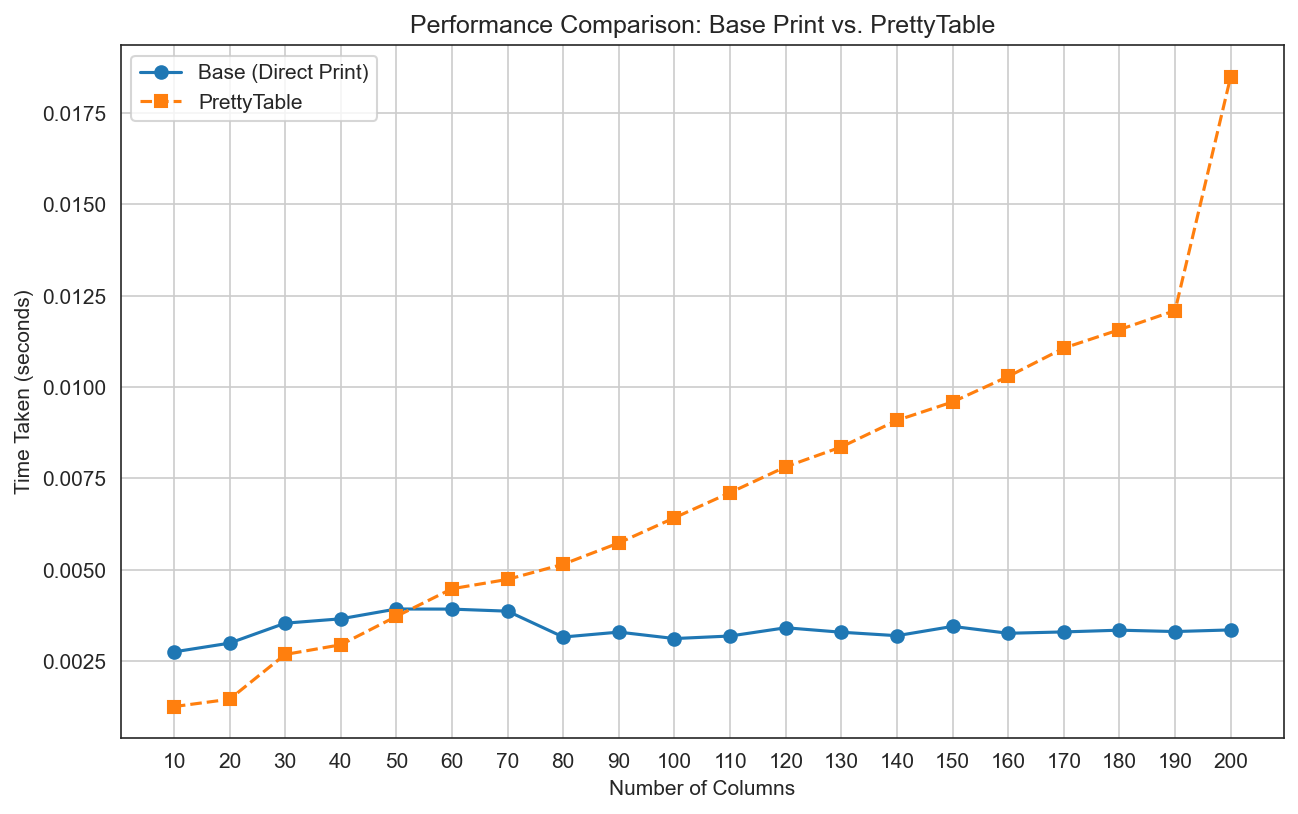

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(prettytable_benchmark["Number of Columns"], prettytable_benchmark["Base Time Taken (s)"],
         marker='o', linestyle='-', label='Base (Direct Print)')
plt.plot(prettytable_benchmark["Number of Columns"], prettytable_benchmark["PrettyTable Time Taken (s)"],
         marker='s', linestyle='--', label='PrettyTable')

plt.xticks(column_steps)
plt.title('Performance Comparison: Base Print vs. PrettyTable')
plt.xlabel('Number of Columns')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.legend()
plt.show()